In [1]:
import anndata
import numpy as np
import pandas as pd
import networkx as nx
import scanpy as sc
import scglue
import tqdm
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/Lee2019/scHiC.h5ad")
hic.obs_names = hic.obs_names.str.split(r"[:_]").map(lambda x: '_'.join(x[:-2]))
hic.obs["cell_type"] = hic.obs_names.str.split(r"[:_]").map(lambda x: x[5])

hic = hic[hic.obs['cell_type'].isin(['Astro', 'Endo', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']),:]

# tmp = hic.copy()
# for i in tqdm.notebook.tqdm(range(tmp.X.shape[1]), desc='column'):
#     left, right = max(i-100, 0), i+101
#     tmp.X[:, i] = hic.X[:, i] / hic.X[:, left:right].sum(axis=1)
# hic.X = np.round(tmp.X*1000, 0)
# hic.X = np.nan_to_num(hic.X)

In [4]:
sc.pp.highly_variable_genes(hic, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(hic)
sc.pp.log1p(hic)
sc.pp.scale(hic)
sc.tl.pca(hic, n_comps=100, svd_solver="auto")

/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


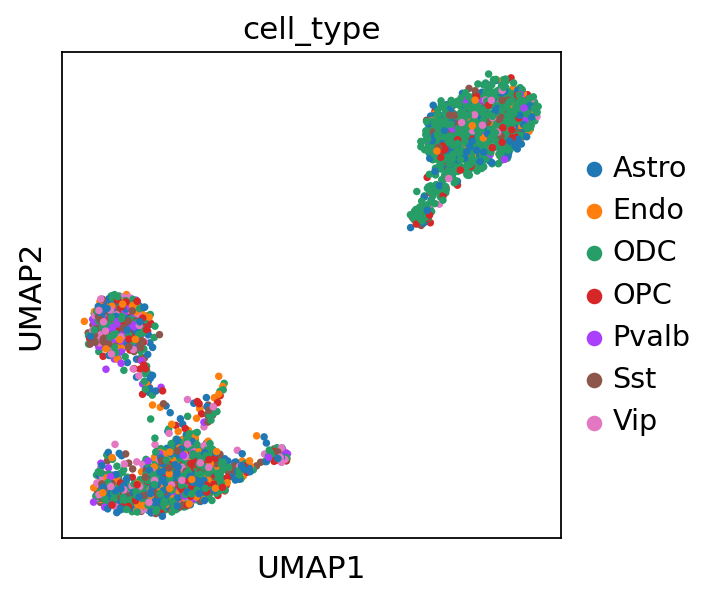

In [5]:
sc.pp.neighbors(hic, metric="cosine")
sc.tl.umap(hic)
sc.pl.umap(hic, color="cell_type")

In [6]:
hic.var[hic.var['highly_variable']==True]

,chrom,start,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
chr1_40000,chr1,40000,True,1529.0,0.048018,0.054117,1.164224,0.032421,0.161050
chr1_110000,chr1,110000,True,1655.0,0.139101,0.168596,1.159498,0.090444,0.266900
chr1_140000,chr1,140000,True,1145.0,0.048018,0.054880,1.180628,0.032666,0.167436
chr1_170000,chr1,170000,True,1824.0,0.120808,0.143616,1.152644,0.079710,0.250206
chr1_350000,chr1,350000,True,1570.0,0.014101,0.015432,1.162259,0.009804,0.090218
...,...,...,...,...,...,...,...,...,...
chrY_58880000,chrY,58880000,True,428.0,20.839177,168.131198,1.258080,3.059789,0.449110
chrY_59140000,chrY,59140000,True,639.0,0.014101,0.016195,1.219685,0.009775,0.095872
chrY_59150000,chrY,59150000,True,1905.0,0.021341,0.023181,1.150022,0.013621,0.101562
chrY_59250000,chrY,59250000,True,1283.0,0.018293,0.020252,1.174308,0.013941,0.119968
